<a href="https://colab.research.google.com/github/ChikoAbillaBasya/PCVK25_3G_09/blob/main/Week05_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D. PERCOBAAN PRAKTIKUM**
---

## **D-1 PERCOBAAN HISTOGRAM**
---
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan
pada
praktikum
“Week5_NoAbsen.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt
import numpy as np
import math
import os
import glob

3. Membuat histogram citra seperti berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

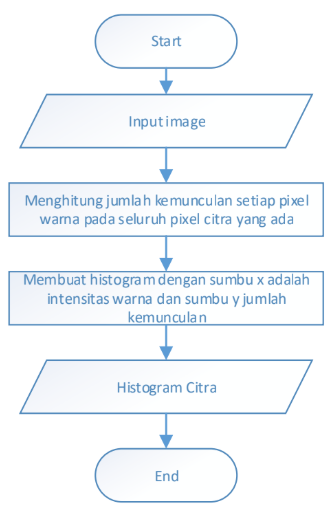

<BarContainer object of 256 artists>

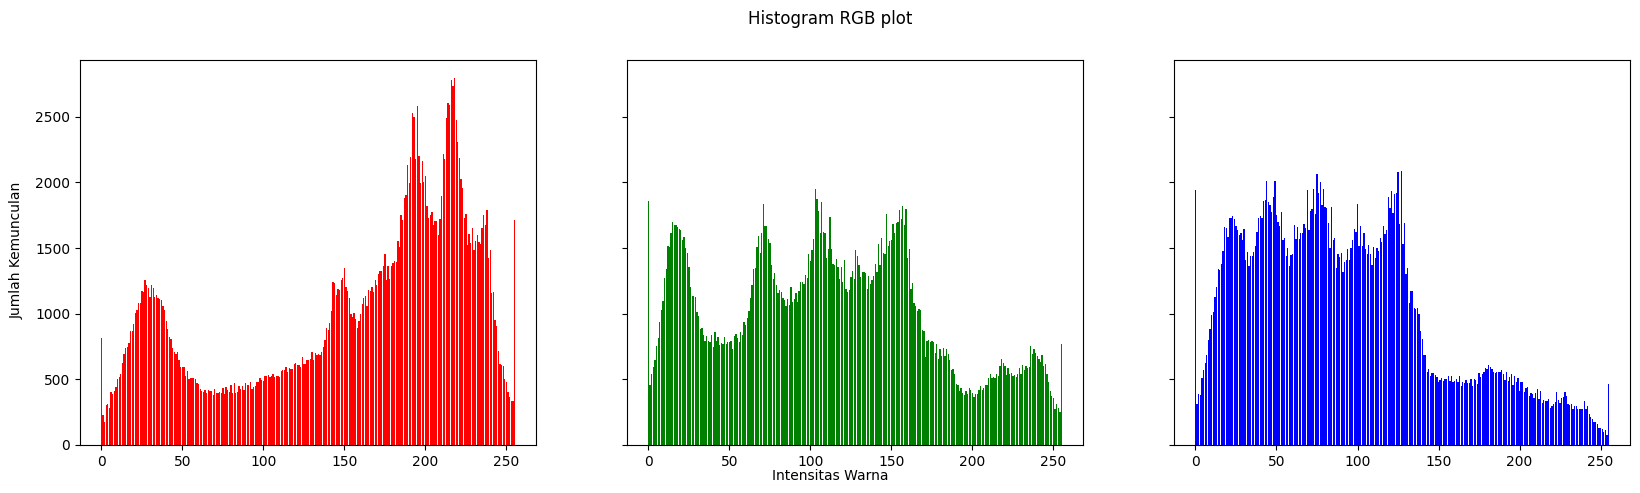

In [ ]:
# Membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


## **PERTANYAAN PRAKTIKUM D1**
---
1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yait “`histogram`”. Bandingkan hasilnya. Apakah output muncul sama?

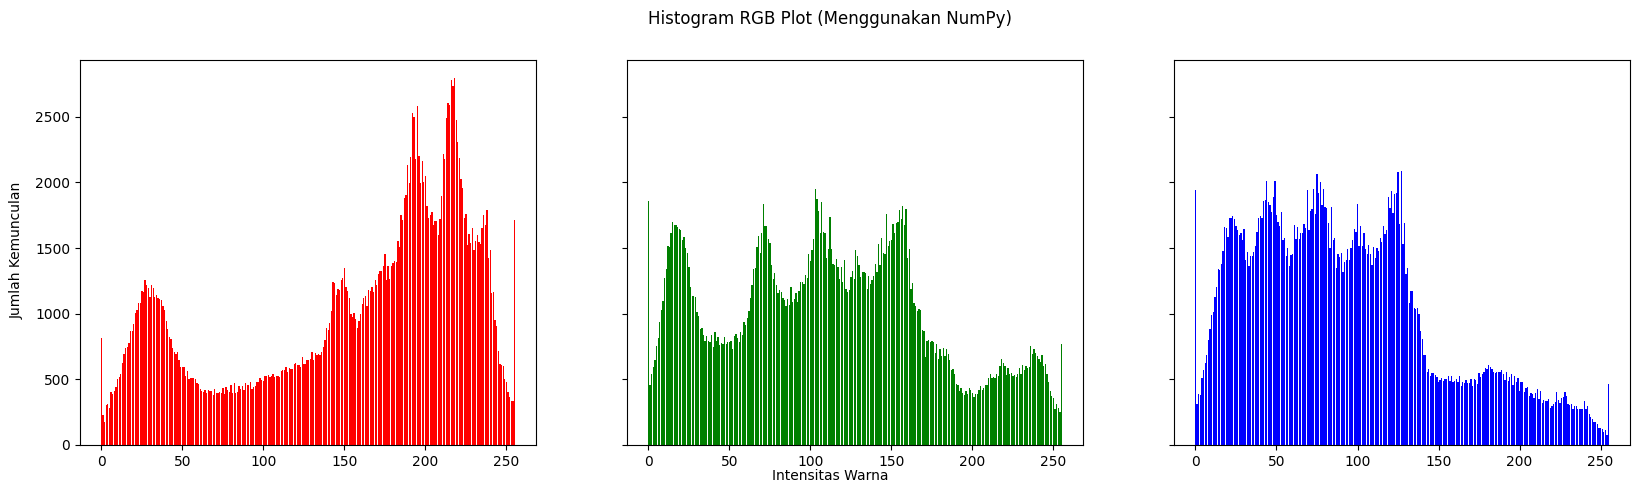

In [ ]:
# Membaca gambar dan mengubah color space ke RGB
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan channel Red, Green, dan Blue
r_channel = img_rgb[:,:,0]
g_channel = img_rgb[:,:,1]
b_channel = img_rgb[:,:,2]

# Menghitung histogram untuk setiap channel menggunakan NumPy
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=[0,256])
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=[0,256])
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=[0,256])

# Plotting hasil histogram
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot (Menggunakan NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_r, color='red')
axs[1].bar(names, hist_g, color='green')
axs[2].bar(names, hist_b, color='blue')

plt.show()

Ya, output visual dan data histogram yang dihasilkan akan sama persis. Kedua metode pada dasarnya melakukan perhitungan yang identik: menghitung jumlah kemunculan setiap nilai intensitas piksel dari 0 hingga 255 untuk masing-masing channel warna.

2. Buatlah histogram dengan menggunakan dengan menggunakan image **KTM lama.jpg**. Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

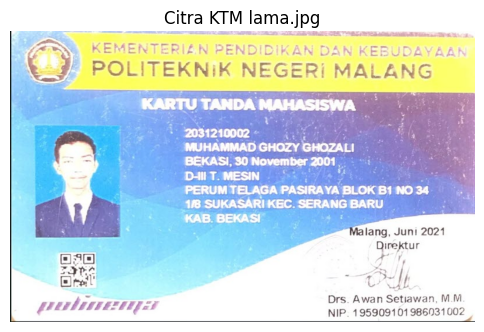

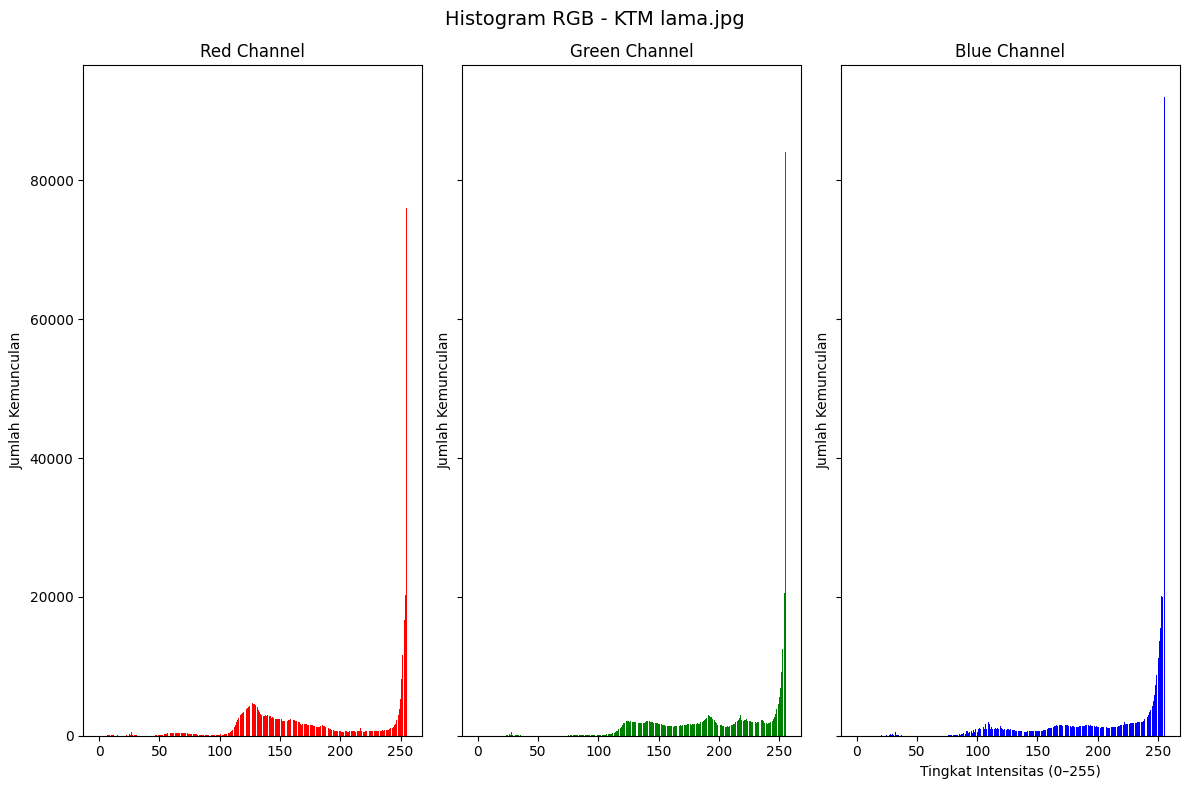

In [ ]:
# Load citra KTM
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/KTM lama.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Hitung histogram per channel dengan NumPy
red_hist, _   = np.histogram(img[:,:,0].ravel(), bins=256, range=[0,256])
green_hist, _ = np.histogram(img[:,:,1].ravel(), bins=256, range=[0,256])
blue_hist, _  = np.histogram(img[:,:,2].ravel(), bins=256, range=[0,256])
names = np.arange(256)

# Plot citra asli
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Citra KTM lama.jpg")
plt.axis("off")
plt.show()

# Plot histogram RGB
fig, axs = plt.subplots(1, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Histogram RGB - KTM lama.jpg", fontsize=14)

axs[0].bar(names, red_hist, color='red')
axs[0].set_title("Red Channel")

axs[1].bar(names, green_hist, color='green')
axs[1].set_title("Green Channel")

axs[2].bar(names, blue_hist, color='blue')
axs[2].set_title("Blue Channel")
axs[2].set_xlabel("Tingkat Intensitas (0–255)")

for ax in axs:
    ax.set_ylabel("Jumlah Kemunculan")

plt.tight_layout()
plt.show()

Histogram dari citra hasil memperlihatkan konsentrasi piksel yang dominan pada rentang intensitas tinggi, dengan puncak mendekati nilai 250. Kondisi ini menyebabkan gambar secara visual cenderung terlalu terang atau sedikit overexposed. Akibatnya, meskipun distribusinya tidak terpusat pada satu titik, kontras antara area gelap dan terang menjadi tidak seimbang. Hal ini berdampak pada hilangnya detail halus pada bagian-bagian citra yang paling terang, seperti latar belakang dan beberapa area wajah. Dengan demikian, dapat disimpulkan bahwa proses pengolahan sebelumnya belum berhasil meningkatkan kualitas informasi visual secara optimal dan justru berpotensi mengurangi kedalaman tekstur pada area dengan pencahayaan berlebih.

## **D-2 PERCOBAAN *HISTOGRAM EQUALIZATION***
---
1. Buatlah histogram citra seperti output `histogram equalization` dan juga tampilan gambar sebelum dan sesudah proses *histogram equalization* berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

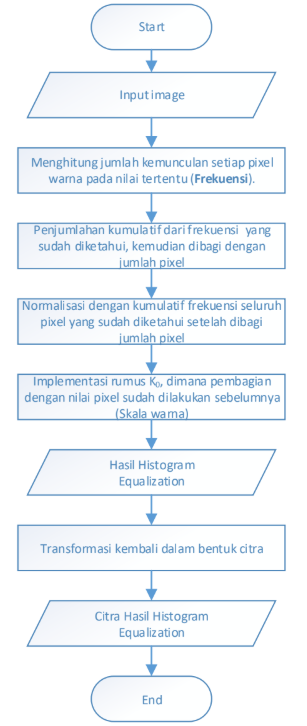

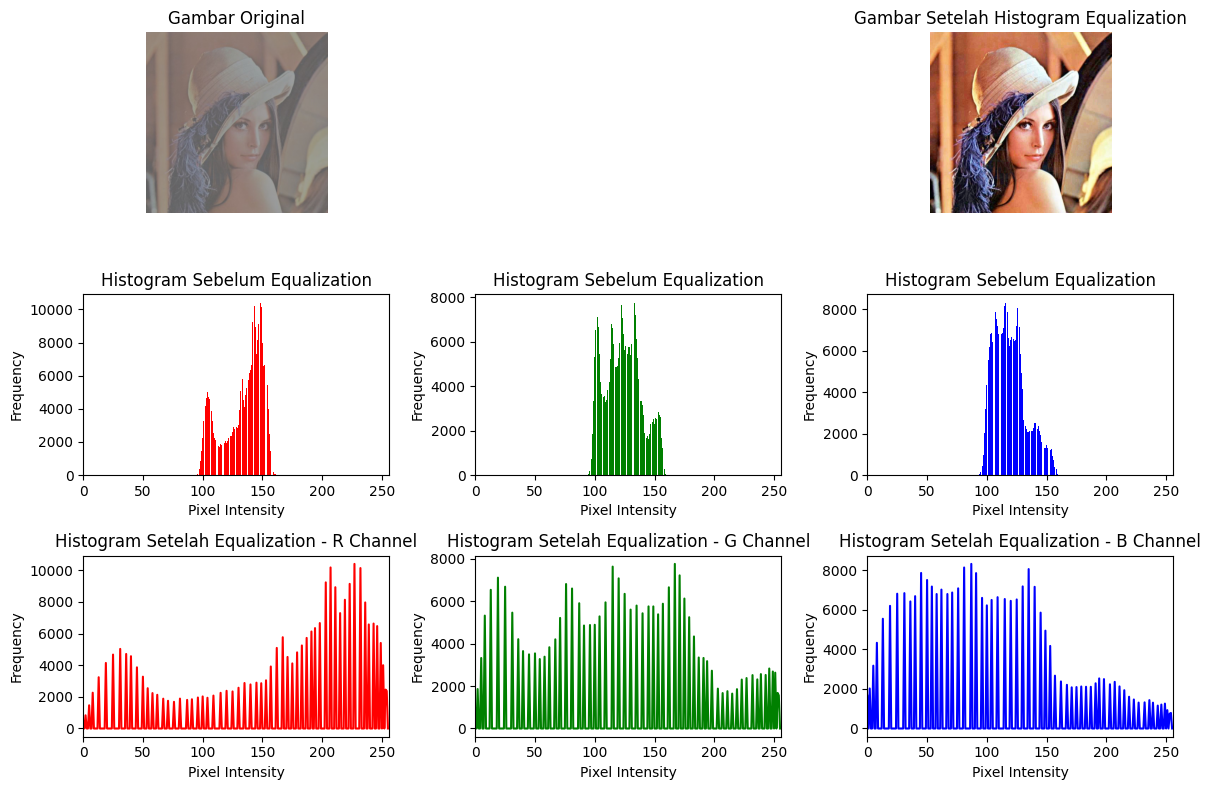

In [ ]:
# Load lena_lc
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menghitung jumlah kemunculan setiap pixel warna (frekuensi)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Menghitung penjumlahan kumulatif dari frekuensi
cdf = hist.cumsum()

# Normalisasi, membagi dengan jumlah total pixel
cdf_normalized = cdf * hist.max() / cdf.max()

# Implementasi rumus k0, Normalisasi CDF
cdf_m = np.ma.masked_equal(cdf, 0)  # Mengabaikan nilai 0
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Rumus Normalisasi
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')  # Mengisi kembali nilai yang diabaikan

# Menerapkan CDF hasil equalization pada gambar
img_equalized = cdf_final[img]

plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)  # 3 rows, 2 columns
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “`equalizeHist`” seperti pada potongan kode berikut ini.  

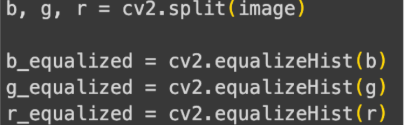

Lengkapi potongan kode tersebut! Bandingkan hasilnya. Apakah output muncul sama?

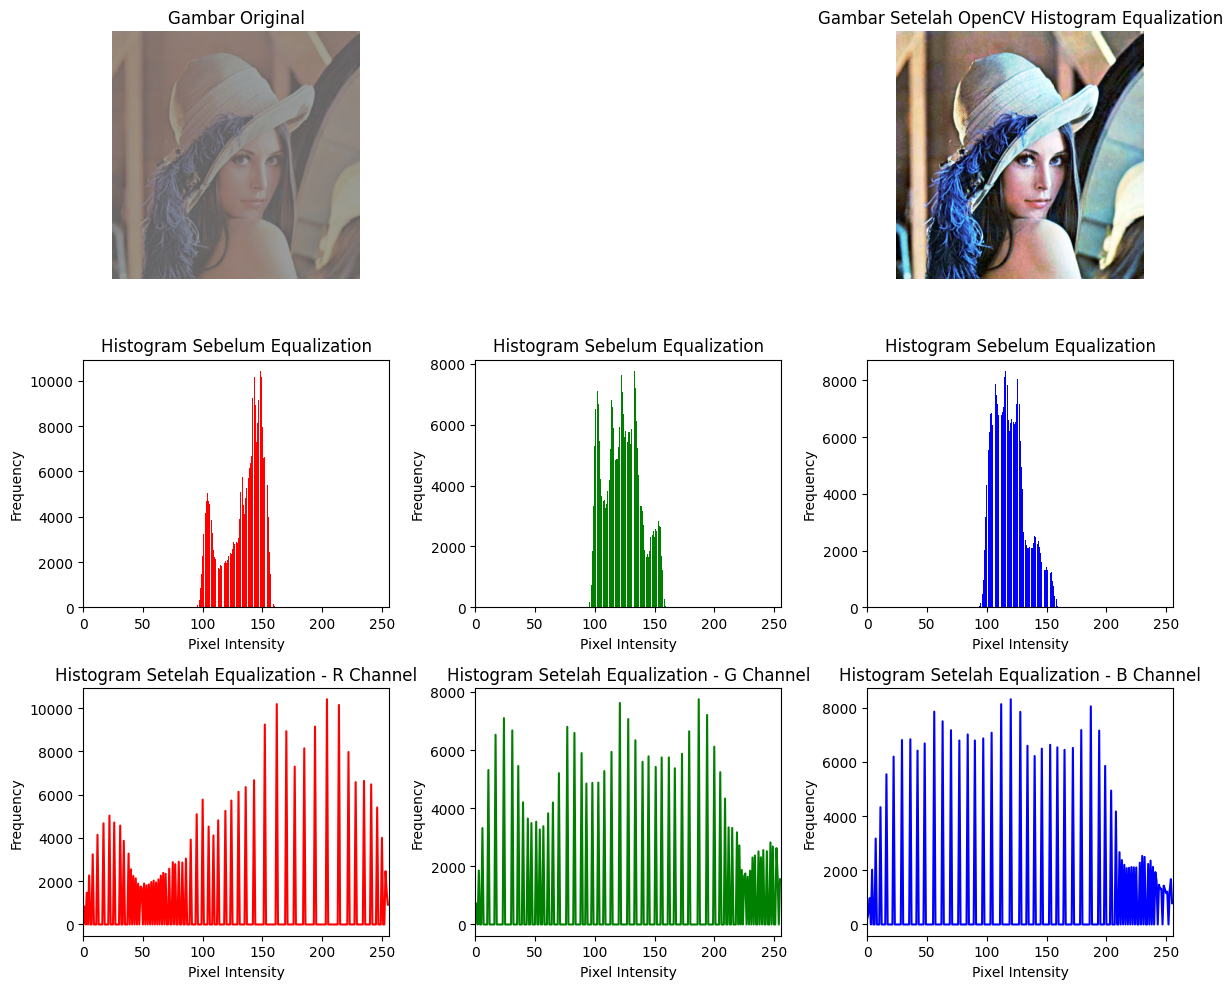

In [ ]:
# Histogram equalization using cv2.equalizeHist
img_equalized = np.zeros_like(img)
for i in range(3):
    img_equalized[:, :, i] = cv.equalizeHist(img[:, :, i])

# Menampilkan gambar asli dan gambar setelah equalization
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

# OpenCV Histogram Equalized Image
plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah OpenCV Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)  # 3 rows, 2 columns
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **PERTANYAAN PRAKTIKUM D2**
---
1. Perbandingan Citra Lena

a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai **PSNR** antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas visual citra? Apakah ada detail baru yang muncul setelah equalization?


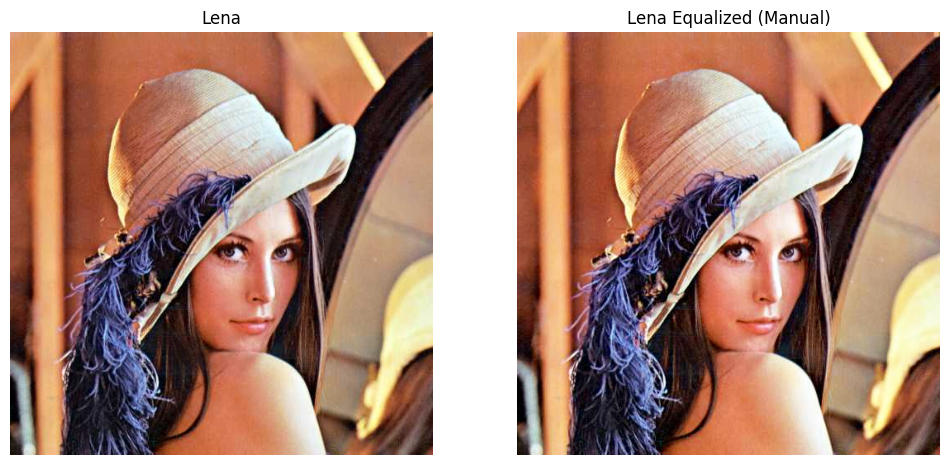

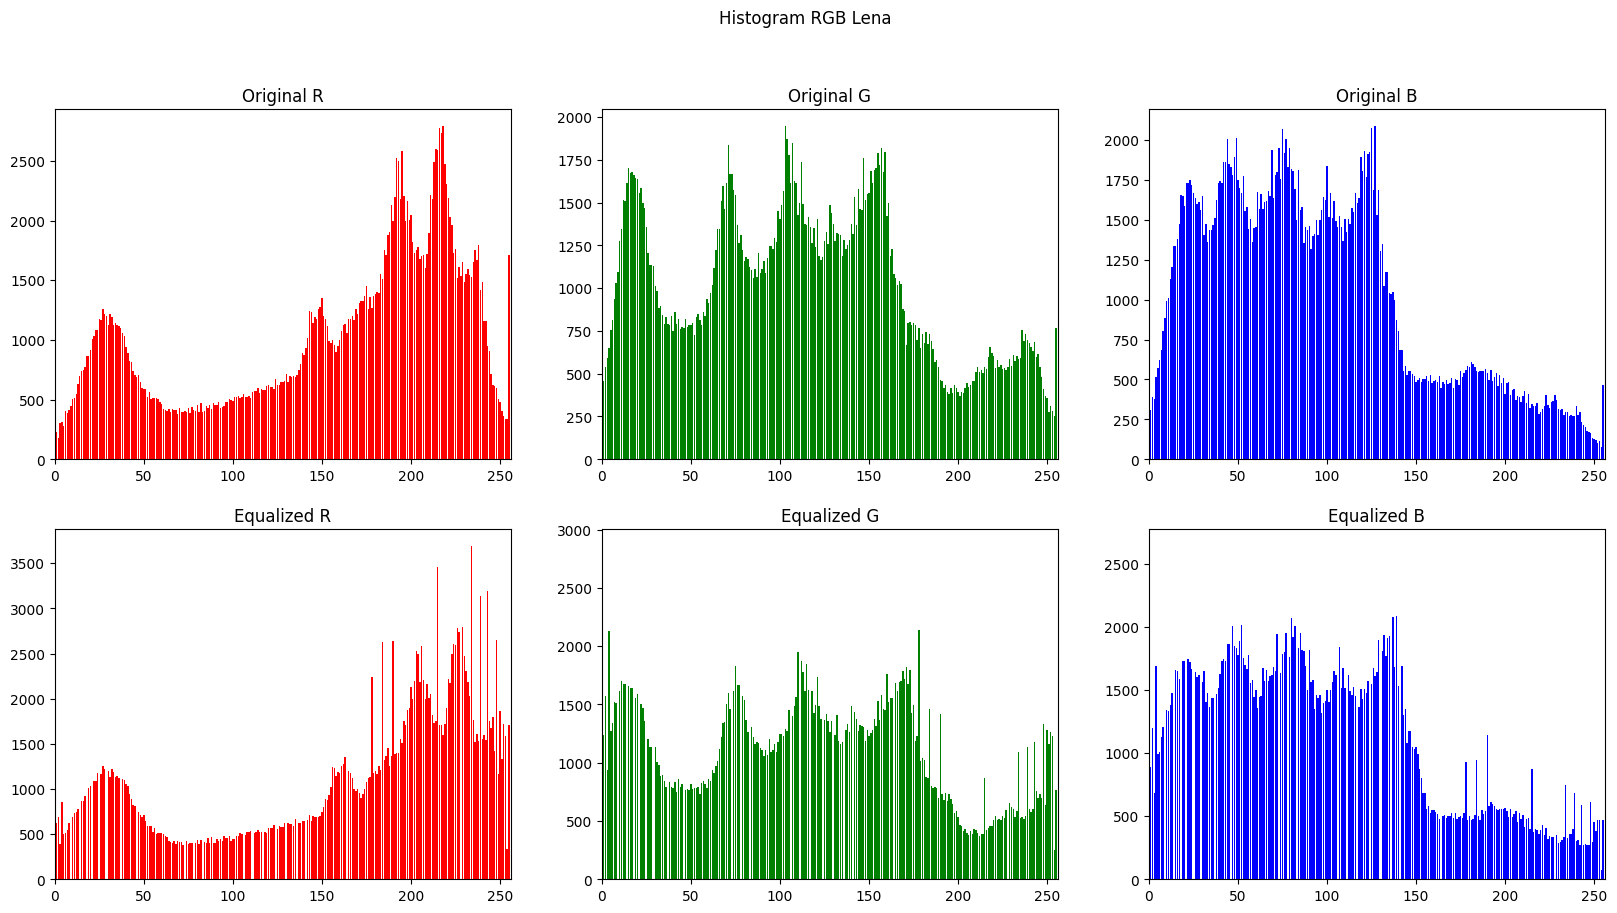

PSNR antara Lena asli & equalized: 29.26 dB


In [ ]:
# Load lena low contrast
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Hitung histogram global
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Hitung CDF
cdf = hist.cumsum()

# Normalisasi
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# Equalization
img_equalized = cdf_final[img]

# Visualisasi gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Lena')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_equalized)
plt.title('Lena Equalized (Manual)')
plt.axis('off')
plt.show()

# Histogram sebelum & sesudah
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
colors = ('r','g','b')

for i, col in enumerate(colors):
    axs[0,i].bar(range(256), cv.calcHist([img],[i],None,[256],[0,256]).flatten(), color=col)
    axs[0,i].set_title(f'Original {col.upper()}')
    axs[0,i].set_xlim([0,256])

    axs[1,i].bar(range(256), cv.calcHist([img_equalized],[i],None,[256],[0,256]).flatten(), color=col)
    axs[1,i].set_title(f'Equalized {col.upper()}')
    axs[1,i].set_xlim([0,256])

plt.suptitle("Histogram RGB Lena")
plt.show()

# Hitung PSNR dengan Lena asli
lena_original = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena.jpg')
lena_original = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)

mse = np.mean((lena_original.astype(np.float64) - img_equalized.astype(np.float64)) ** 2)
PIXEL_MAX = 255.0
psnr = 20 * np.log10(PIXEL_MAX / np.sqrt(mse))
print(f"PSNR antara Lena asli & equalized: {psnr:.2f} dB")

Nilai PSNR yang mencapai 29,26 dB mengonfirmasi bahwa kualitas citra hasil sangat mendekati aslinya. Secara visual, efek dari histogram equalization pun hampir tidak terlihat. Hal ini dapat dijelaskan karena citra asli sudah memiliki distribusi kontras yang baik, sehingga proses ekualisasi hanya melakukan penyesuaian minor pada sebaran intensitasnya. Akibatnya, tidak ada perubahan drastis pada tampilan visual maupun penambahan detail baru yang signifikan.

2. Gunakan Citra **KTM Lama.jpg**

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan **citra asli, citra hasil equalization, serta histogram keduanya**
dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah, teks, atau latar belakang). Apakah perubahan tersebut **meningkatkan kualitas informasi** dari citra atau justru membuat citra terlihat terlalu “keras”.

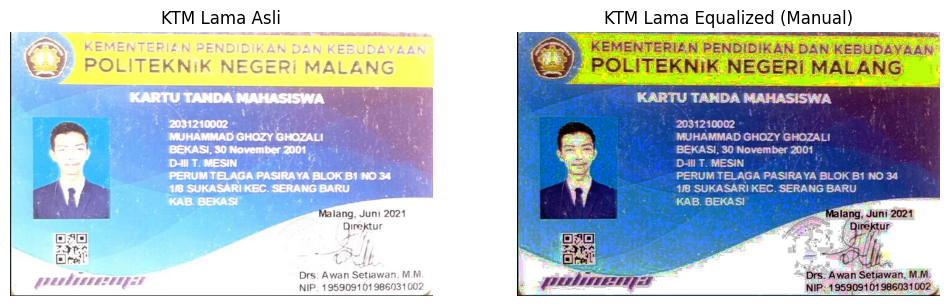

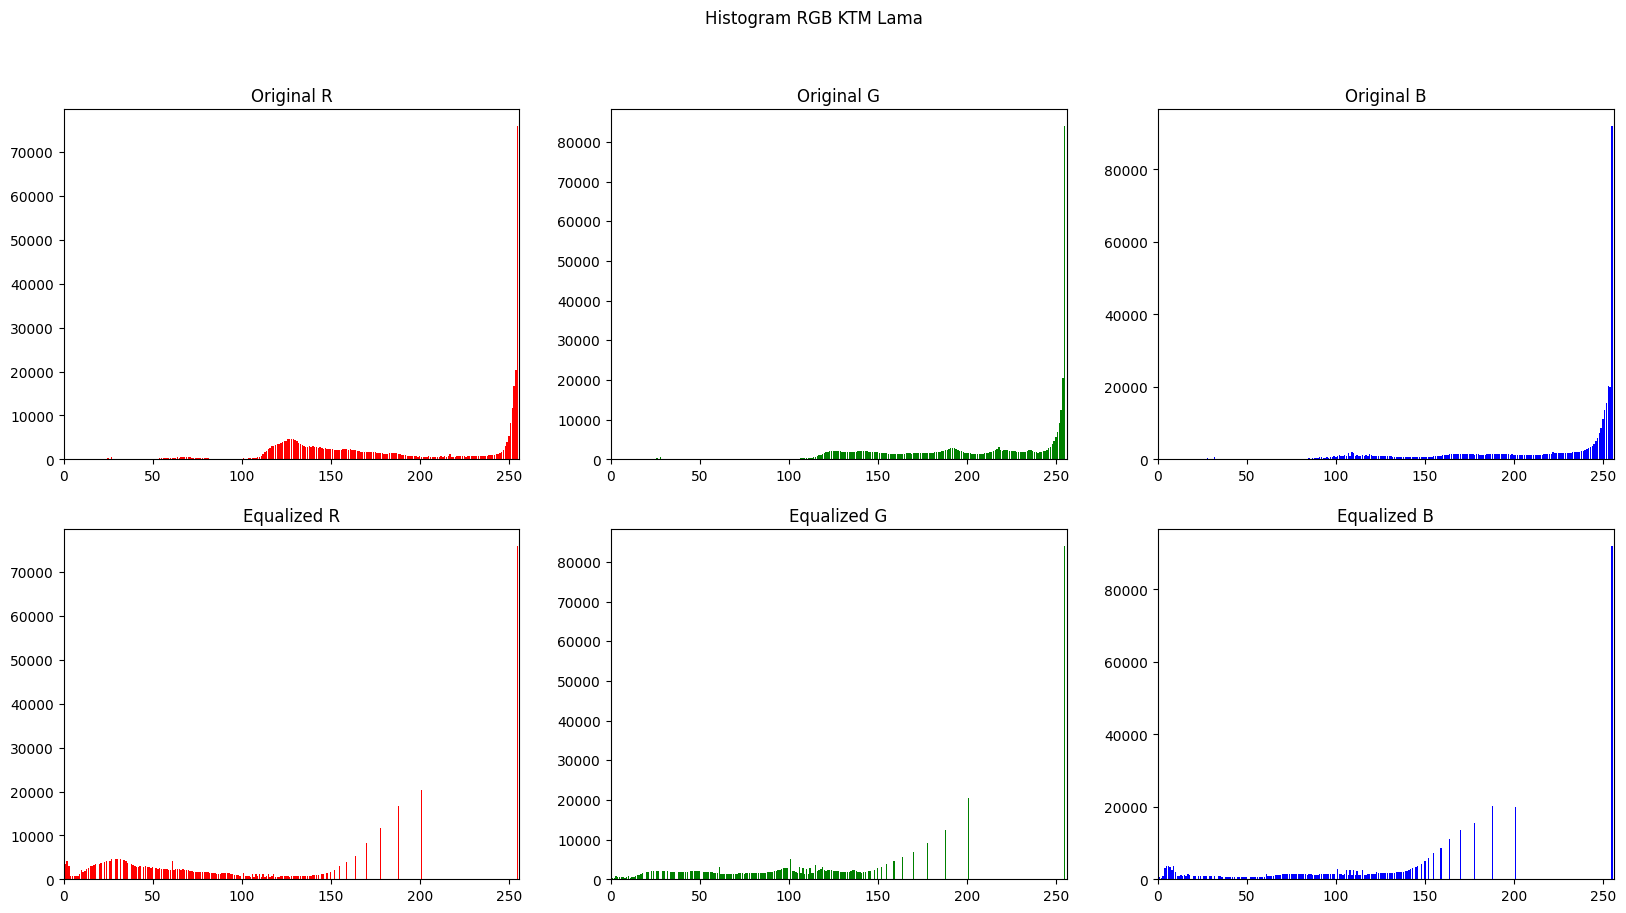

In [ ]:
# Load KTM Lama (warna)
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/KTM lama.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Hitung histogram global
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Hitung CDF
cdf = hist.cumsum()

# Normalisasi CDF
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# Equalization manual (RGB langsung)
img_equalized = cdf_final[img]

# Visualisasi gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('KTM Lama Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_equalized)
plt.title('KTM Lama Equalized (Manual)')
plt.axis('off')
plt.show()

# Histogram sebelum & sesudah
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
colors = ('r','g','b')

for i, col in enumerate(colors):
    axs[0,i].bar(range(256), cv.calcHist([img],[i],None,[256],[0,256]).flatten(), color=col)
    axs[0,i].set_title(f'Original {col.upper()}')
    axs[0,i].set_xlim([0,256])

    axs[1,i].bar(range(256), cv.calcHist([img_equalized],[i],None,[256],[0,256]).flatten(), color=col)
    axs[1,i].set_title(f'Equalized {col.upper()}')
    axs[1,i].set_xlim([0,256])

plt.suptitle("Histogram RGB KTM Lama")
plt.show()

Histogram Equalization (HE) secara drastis meningkatkan kontras, membuat warna lebih tajam dan detail yang sebelumnya pudar (seperti teks atau wajah) menjadi jelas. Meskipun hasilnya terkadang bisa terlihat tidak alami atau "keras" karena sifatnya yang global, peningkatan kejelasan ini sangat bermanfaat untuk mengekstrak informasi dari gambar berkualitas rendah.

## **D-3 TUGAS PRAKTIKUM DITHERING**
---
1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

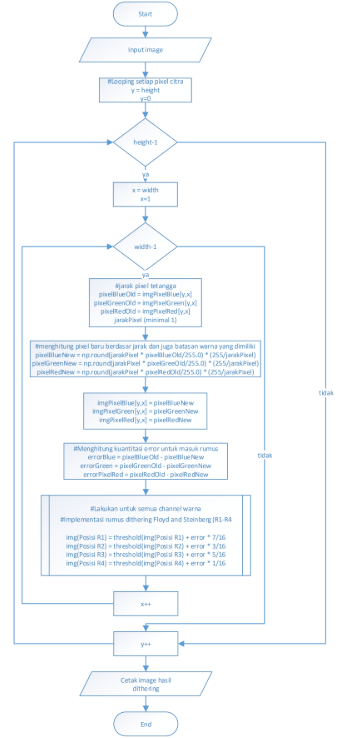

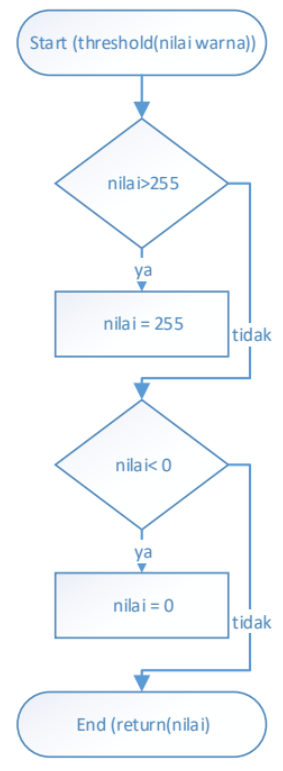

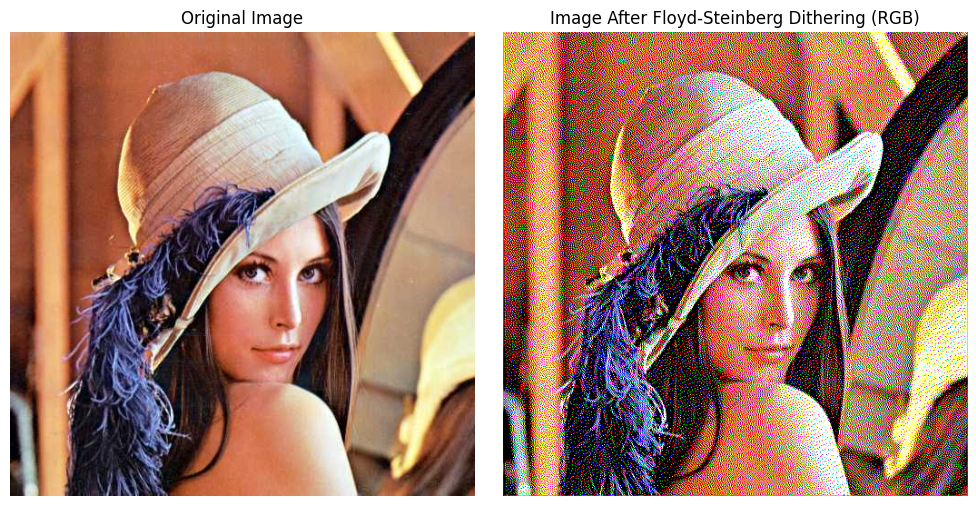

In [ ]:
# Matriks dithering Floyd-Steinberg
fs_matrix = np.array([[0, 0, 7],
                      [3, 5, 1]]) / 16

# Muat gambar dan konversi ke format RGB
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi gambar ke RGB

# Normalisasi gambar agar nilai piksel berada di antara 0 dan 1
img = img.astype(np.float32) / 255.0

# Ambil dimensi gambar
rows, cols, channels = img.shape

# Buat salinan gambar untuk menerapkan dithering
dithered_img = np.copy(img)

# Terapkan dithering Floyd-Steinberg pada setiap channel secara terpisah
for y in range(rows - 1):
    for x in range(1, cols - 1):
        for c in range(channels):  # Iterasi melalui setiap kanal warna (R, G, B)
            old_pixel = dithered_img[y, x, c]
            new_pixel = np.round(old_pixel)  # Kuantisasi ke nilai 0 atau 1
            dithered_img[y, x, c] = new_pixel
            error = old_pixel - new_pixel

            # Distribusikan error ke piksel-piksel tetangga
            dithered_img[y, x+1, c] += error * 7 / 16
            dithered_img[y+1, x-1, c] += error * 3 / 16
            dithered_img[y+1, x, c]   += error * 5 / 16
            dithered_img[y+1, x+1, c] += error * 1 / 16

# # Konversi kembali gambar hasil dithering ke rentang 0-255 untuk ditampilkan
dithered_img = (dithered_img * 255).astype(np.uint8)

# Tampilkan gambar asli dan gambar hasil dithering
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dithered_img)
plt.title('Image After Floyd-Steinberg Dithering (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()

2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan *histogram equalization* sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
*histogram equalization* implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

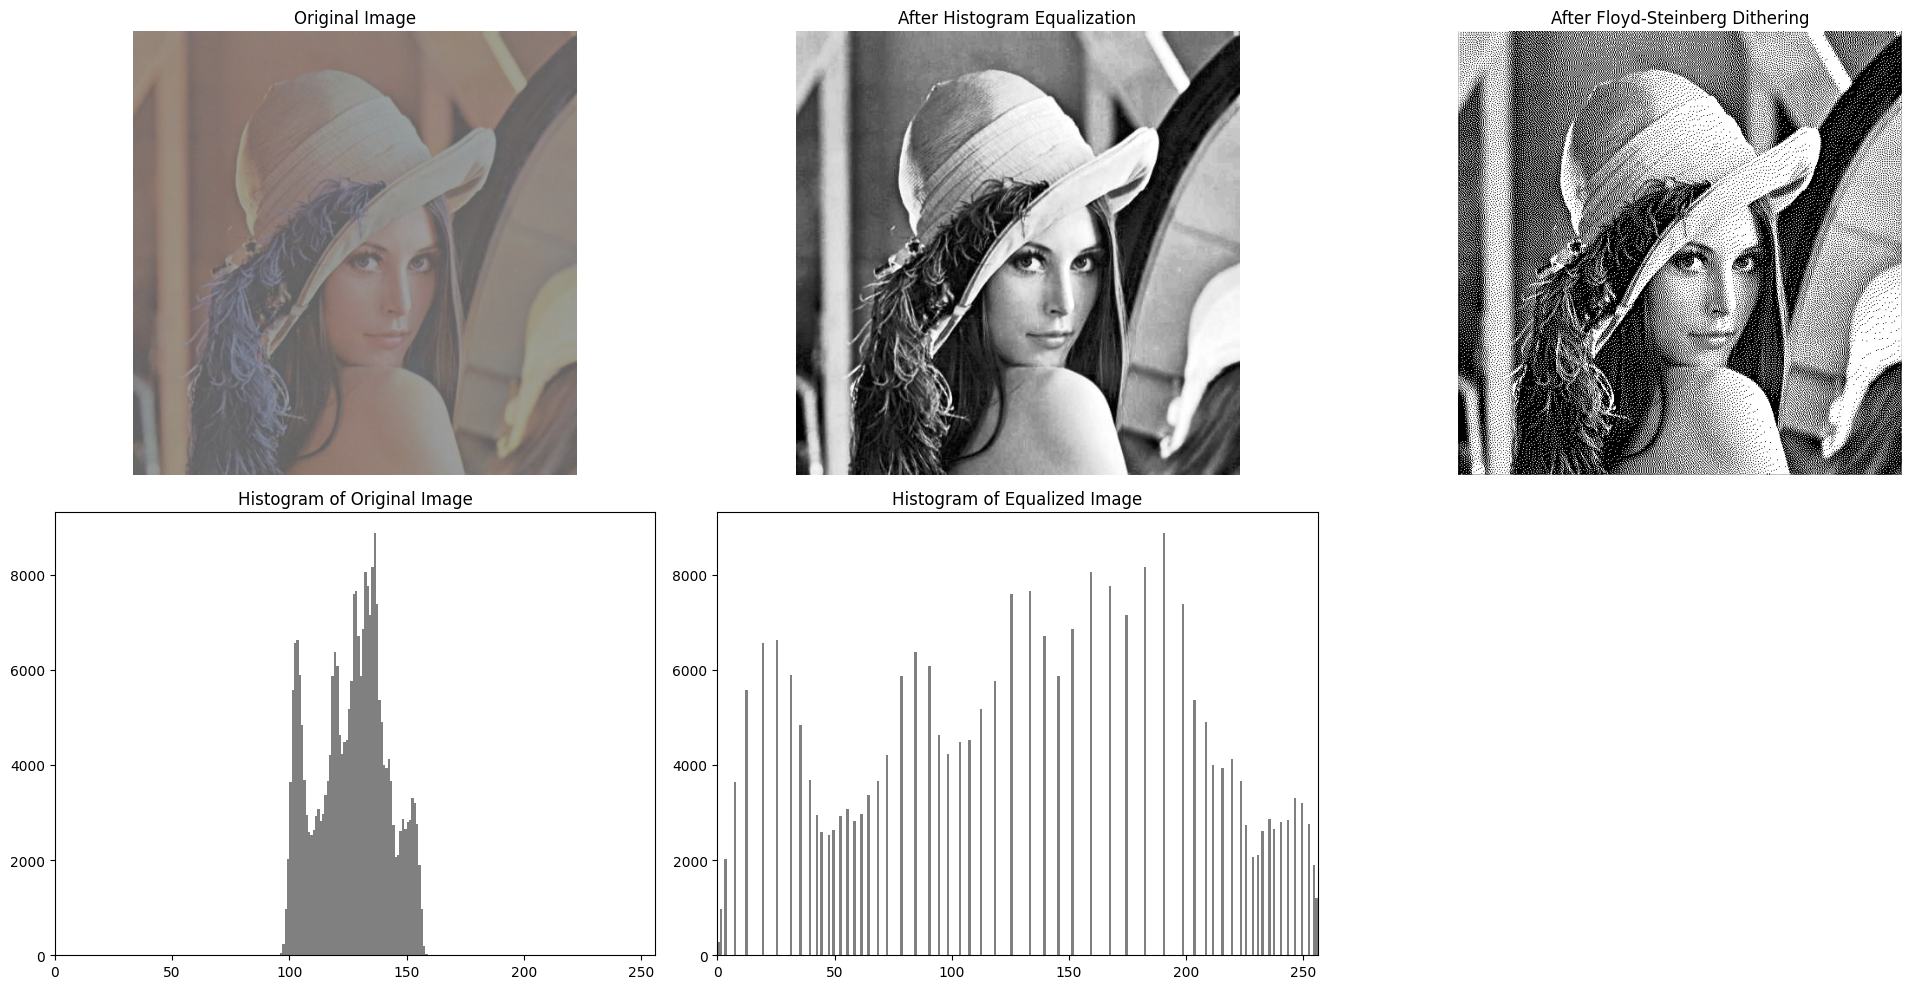

In [ ]:
# Muat gambar
img_path = '/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena_lc.jpg'
img = cv.imread(img_path)
img_ori = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi gambar ke grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Terapkan histogram equalization
equalized_img = cv.equalizeHist(gray_img)

# Matriks dithering Floyd-Steinberg
fs_matrix = np.array([[0, 0, 7],
                      [3, 5, 1]]) / 16

# Normalisasi gambar hasil ekualisasi agar nilai piksel berada di antara 0 dan 1
img_normalized = equalized_img.astype(np.float32) / 255.0

# Ambil dimensi gambar
rows, cols = img_normalized.shape

# Buat salinan gambar untuk menerapkan dithering
dithered_img = np.copy(img_normalized)

# Terapkan dithering Floyd-Steinberg
for y in range(rows - 1):
    for x in range(1, cols - 1):
        old_pixel = dithered_img[y, x]
        new_pixel = np.round(old_pixel)  # Kuantisasi ke nilai 0 atau 1
        dithered_img[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Distribusikan error ke piksel-piksel tetangga
        dithered_img[y, x + 1] += error * 7 / 16
        dithered_img[y + 1, x - 1] += error * 3 / 16
        dithered_img[y + 1, x] += error * 5 / 16
        dithered_img[y + 1, x + 1] += error * 1 / 16

# Konversi kembali gambar hasil dithering ke rentang 0-255 untuk ditampilkan
dithered_img = (dithered_img * 255).astype(np.uint8)

# Tampilkan plot gambar asli, hasil ekualisasi, hasil dithering, dan histogramnya
plt.figure(figsize=(20, 10))

# Gambar Asli dan Histogramnya
plt.subplot(2, 3, 1)
plt.imshow(img_ori)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

# Gambar Hasil Ekualisasi dan Histogramnya
plt.subplot(2, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('After Histogram Equalization')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])

# Gambar Hasil Dithering
plt.subplot(2, 3, 3)
plt.imshow(dithered_img, cmap='gray')
plt.title('After Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()